<h1 align="center"> Project 1 Web Scraping with API </h1>

---------

In [1]:
#import

import requests 
from datetime import datetime
import pytz
import csv
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import folium

%matplotlib inline

## Website API doc

https://darksky.net/dev/docs

In [2]:
#weclouddata location

latitude = '43.670'

longitude = '-79.390'

spot = folium.Map(
    location=[43.670, -79.390],
    zoom_start=11
)
folium.Marker([latitude, longitude]).add_to(spot)

#API secret key,timestamp 

key = 'ea5c302864c8a86ca449159198bdb7ea'

date = '2009-01-01'

time = int(datetime.strptime(date,'%Y-%m-%d').timestamp())

#sometimes API data is incomplete, we have to give csv the columns

csv_columns = ['time', 'summary', 'icon', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensity', 'precipIntensityMax', 'precipIntensityMaxTime', 'precipProbability', 'precipAccumulation', 'precipType', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windGustTime', 'windBearing', 'cloudCover', 'uvIndex', 'uvIndexTime', 'visibility', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 
                   'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

spot

In [3]:
#get data from Dark Sky API

for i in range(1,1000): #free API daily limit is 1000, adjust the loop range accordingly 
    
    url = f'https://api.darksky.net/forecast/{key}/{latitude},{longitude},{time}?exclude=hourly/'
    
    r = requests.get(url)
    
    j = json.loads(r.text)
    
#write data into csv file    
    try:
    
        d = j['daily']['data'][0]
    except:
        
        d = j['currently']
        
    with open(r'D:\GitHub\Mypractice\Projects\Toronto_weather.csv', 'a',encoding='utf-8') as f:
        w = csv.DictWriter(f,fieldnames=csv_columns,extrasaction='ignore')
        if i==1:
            w.writeheader()
        else:
            pass
        w.writerow(d)
        
    time += 86400

In [4]:
#read csv file in pandas

df = pd.read_csv(r'D:\GitHub\Mypractice\Projects\Toronto_weather.csv')
df.tail()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,uvIndexTime,visibility,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
994,1316664000,Partly cloudy throughout the day.,partly-cloudy-day,1316689560,1316733420,0.83,0.0000,0.0006,1.316747e+09,0.02,...,1316709180,9.129,61.98,1316743260,73.93,1316715180,62.47,1316743260,73.43,1316715180
995,1316750400,Heavy rain until evening.,rain,1316776020,1316819700,0.87,0.0538,0.2462,1.316801e+09,0.90,...,1316797800,7.991,60.42,1316800800,66.66,1316825940,61.27,1316800800,67.13,1316825940
996,1316836800,Partly cloudy throughout the day.,partly-cloudy-day,1316862480,1316906040,0.91,0.0000,0.0005,1.316841e+09,0.02,...,1316886480,9.848,54.98,1316859840,70.11,1316890800,55.47,1316859840,69.61,1316890800
997,1316923200,Partly cloudy throughout the day.,partly-cloudy-day,1316948940,1316992320,0.94,0.0001,0.0015,1.317006e+09,0.22,...,1316972160,9.846,60.06,1316948160,72.15,1316980800,60.65,1316948040,71.65,1316980800
998,1317009600,Clear throughout the day.,partly-cloudy-day,1317035400,1317078600,0.98,0.0093,0.0617,1.317092e+09,0.22,...,1317058200,9.926,65.06,1317038040,73.95,1317062580,65.88,1317037260,74.13,1317062520


In [5]:
#get all the columns use timestamp

l=[]
for i in csv_columns:
    if 'ime' in i:
        l.append(i)
    else:
        pass
print(l)

['time', 'sunriseTime', 'sunsetTime', 'precipIntensityMaxTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'windGustTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']


In [6]:
#change all the timestamp to datetime

for i in l:
    df[i] = pd.to_datetime(df[i], unit='s')

df.tail()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,uvIndexTime,visibility,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
994,2011-09-22 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-22 11:06:00,2011-09-22 23:17:00,0.83,0.0000,0.0006,2011-09-23 02:57:00,0.02,...,2011-09-22 16:33:00,9.129,61.98,2011-09-23 02:01:00,73.93,2011-09-22 18:13:00,62.47,2011-09-23 02:01:00,73.43,2011-09-22 18:13:00
995,2011-09-23 04:00:00,Heavy rain until evening.,rain,2011-09-23 11:07:00,2011-09-23 23:15:00,0.87,0.0538,0.2462,2011-09-23 18:01:00,0.90,...,2011-09-23 17:10:00,7.991,60.42,2011-09-23 18:00:00,66.66,2011-09-24 00:59:00,61.27,2011-09-23 18:00:00,67.13,2011-09-24 00:59:00
996,2011-09-24 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-24 11:08:00,2011-09-24 23:14:00,0.91,0.0000,0.0005,2011-09-24 05:03:00,0.02,...,2011-09-24 17:48:00,9.848,54.98,2011-09-24 10:24:00,70.11,2011-09-24 19:00:00,55.47,2011-09-24 10:24:00,69.61,2011-09-24 19:00:00
997,2011-09-25 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-25 11:09:00,2011-09-25 23:12:00,0.94,0.0001,0.0015,2011-09-26 02:57:00,0.22,...,2011-09-25 17:36:00,9.846,60.06,2011-09-25 10:56:00,72.15,2011-09-25 20:00:00,60.65,2011-09-25 10:54:00,71.65,2011-09-25 20:00:00
998,2011-09-26 04:00:00,Clear throughout the day.,partly-cloudy-day,2011-09-26 11:10:00,2011-09-26 23:10:00,0.98,0.0093,0.0617,2011-09-27 03:00:00,0.22,...,2011-09-26 17:30:00,9.926,65.06,2011-09-26 11:54:00,73.95,2011-09-26 18:43:00,65.88,2011-09-26 11:41:00,74.13,2011-09-26 18:42:00


In [7]:
#add year and month

df['year']=df['time'].dt.year
df['month']=df['time'].dt.month
df.tail()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
994,2011-09-22 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-22 11:06:00,2011-09-22 23:17:00,0.83,0.0000,0.0006,2011-09-23 02:57:00,0.02,...,61.98,2011-09-23 02:01:00,73.93,2011-09-22 18:13:00,62.47,2011-09-23 02:01:00,73.43,2011-09-22 18:13:00,2011,9
995,2011-09-23 04:00:00,Heavy rain until evening.,rain,2011-09-23 11:07:00,2011-09-23 23:15:00,0.87,0.0538,0.2462,2011-09-23 18:01:00,0.90,...,60.42,2011-09-23 18:00:00,66.66,2011-09-24 00:59:00,61.27,2011-09-23 18:00:00,67.13,2011-09-24 00:59:00,2011,9
996,2011-09-24 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-24 11:08:00,2011-09-24 23:14:00,0.91,0.0000,0.0005,2011-09-24 05:03:00,0.02,...,54.98,2011-09-24 10:24:00,70.11,2011-09-24 19:00:00,55.47,2011-09-24 10:24:00,69.61,2011-09-24 19:00:00,2011,9
997,2011-09-25 04:00:00,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-25 11:09:00,2011-09-25 23:12:00,0.94,0.0001,0.0015,2011-09-26 02:57:00,0.22,...,60.06,2011-09-25 10:56:00,72.15,2011-09-25 20:00:00,60.65,2011-09-25 10:54:00,71.65,2011-09-25 20:00:00,2011,9
998,2011-09-26 04:00:00,Clear throughout the day.,partly-cloudy-day,2011-09-26 11:10:00,2011-09-26 23:10:00,0.98,0.0093,0.0617,2011-09-27 03:00:00,0.22,...,65.06,2011-09-26 11:54:00,73.95,2011-09-26 18:43:00,65.88,2011-09-26 11:41:00,74.13,2011-09-26 18:42:00,2011,9


In [8]:
#change datetime to date

df['time'] = df['time'].dt.date
df.head()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
0,2009-01-01,Partly cloudy throughout the day.,partly-cloudy-day,2009-01-01 12:52:00,2009-01-01 21:53:00,0.17,0.0000,0.0000,NaT,0.00,...,7.97,2009-01-01 07:40:00,26.88,2009-01-02 04:00:00,2.21,2009-01-01 05:00:00,24.89,2009-01-02 03:05:00,2009,1
1,2009-01-02,Snow (< 2 in.) in the evening and overnight.,snow,2009-01-02 12:52:00,2009-01-02 21:53:00,0.20,0.0043,0.0302,2009-01-03 02:33:00,0.67,...,26.10,2009-01-02 05:00:00,35.53,2009-01-02 18:00:00,19.22,2009-01-03 01:03:00,29.96,2009-01-02 09:04:00,2009,1
2,2009-01-03,Clear throughout the day.,snow,2009-01-03 12:52:00,2009-01-03 21:54:00,0.24,0.0001,0.0016,2009-01-03 21:30:00,0.28,...,16.77,2009-01-04 04:00:00,30.37,2009-01-03 09:00:00,12.50,2009-01-04 01:01:00,23.52,2009-01-03 09:06:00,2009,1
3,2009-01-04,Mostly cloudy throughout the day.,partly-cloudy-day,2009-01-04 12:52:00,2009-01-04 21:55:00,0.27,0.0000,0.0000,NaT,0.00,...,14.67,2009-01-04 11:47:00,30.64,2009-01-04 22:44:00,5.19,2009-01-04 11:49:00,28.35,2009-01-05 03:40:00,2009,1
4,2009-01-05,Possible light snow in the afternoon.,snow,2009-01-05 12:52:00,2009-01-05 21:56:00,0.31,0.0002,0.0027,2009-01-05 20:05:00,0.52,...,20.61,2009-01-06 04:00:00,34.32,2009-01-05 09:21:00,13.68,2009-01-05 23:12:00,28.54,2009-01-05 08:21:00,2009,1


In [9]:
# rename time to date

df.rename(columns={'time':'date'}, inplace=True)
df.tail()

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
994,2011-09-22,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-22 11:06:00,2011-09-22 23:17:00,0.83,0.0000,0.0006,2011-09-23 02:57:00,0.02,...,61.98,2011-09-23 02:01:00,73.93,2011-09-22 18:13:00,62.47,2011-09-23 02:01:00,73.43,2011-09-22 18:13:00,2011,9
995,2011-09-23,Heavy rain until evening.,rain,2011-09-23 11:07:00,2011-09-23 23:15:00,0.87,0.0538,0.2462,2011-09-23 18:01:00,0.90,...,60.42,2011-09-23 18:00:00,66.66,2011-09-24 00:59:00,61.27,2011-09-23 18:00:00,67.13,2011-09-24 00:59:00,2011,9
996,2011-09-24,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-24 11:08:00,2011-09-24 23:14:00,0.91,0.0000,0.0005,2011-09-24 05:03:00,0.02,...,54.98,2011-09-24 10:24:00,70.11,2011-09-24 19:00:00,55.47,2011-09-24 10:24:00,69.61,2011-09-24 19:00:00,2011,9
997,2011-09-25,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-25 11:09:00,2011-09-25 23:12:00,0.94,0.0001,0.0015,2011-09-26 02:57:00,0.22,...,60.06,2011-09-25 10:56:00,72.15,2011-09-25 20:00:00,60.65,2011-09-25 10:54:00,71.65,2011-09-25 20:00:00,2011,9
998,2011-09-26,Clear throughout the day.,partly-cloudy-day,2011-09-26 11:10:00,2011-09-26 23:10:00,0.98,0.0093,0.0617,2011-09-27 03:00:00,0.22,...,65.06,2011-09-26 11:54:00,73.95,2011-09-26 18:43:00,65.88,2011-09-26 11:41:00,74.13,2011-09-26 18:42:00,2011,9


In [10]:
#change datetime to local time

for i in l[1:]:
    try:
        df[i]=df[i].dt.tz_localize(tz=pytz.timezone('Canada/Eastern'))
    except:
        pass
df.tail()

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
994,2011-09-22,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-22 11:06:00-04:00,2011-09-22 23:17:00-04:00,0.83,0.0000,0.0006,2011-09-23 02:57:00-04:00,0.02,...,61.98,2011-09-23 02:01:00-04:00,73.93,2011-09-22 18:13:00-04:00,62.47,2011-09-23 02:01:00,73.43,2011-09-22 18:13:00-04:00,2011,9
995,2011-09-23,Heavy rain until evening.,rain,2011-09-23 11:07:00-04:00,2011-09-23 23:15:00-04:00,0.87,0.0538,0.2462,2011-09-23 18:01:00-04:00,0.90,...,60.42,2011-09-23 18:00:00-04:00,66.66,2011-09-24 00:59:00-04:00,61.27,2011-09-23 18:00:00,67.13,2011-09-24 00:59:00-04:00,2011,9
996,2011-09-24,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-24 11:08:00-04:00,2011-09-24 23:14:00-04:00,0.91,0.0000,0.0005,2011-09-24 05:03:00-04:00,0.02,...,54.98,2011-09-24 10:24:00-04:00,70.11,2011-09-24 19:00:00-04:00,55.47,2011-09-24 10:24:00,69.61,2011-09-24 19:00:00-04:00,2011,9
997,2011-09-25,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-25 11:09:00-04:00,2011-09-25 23:12:00-04:00,0.94,0.0001,0.0015,2011-09-26 02:57:00-04:00,0.22,...,60.06,2011-09-25 10:56:00-04:00,72.15,2011-09-25 20:00:00-04:00,60.65,2011-09-25 10:54:00,71.65,2011-09-25 20:00:00-04:00,2011,9
998,2011-09-26,Clear throughout the day.,partly-cloudy-day,2011-09-26 11:10:00-04:00,2011-09-26 23:10:00-04:00,0.98,0.0093,0.0617,2011-09-27 03:00:00-04:00,0.22,...,65.06,2011-09-26 11:54:00-04:00,73.95,2011-09-26 18:43:00-04:00,65.88,2011-09-26 11:41:00,74.13,2011-09-26 18:42:00-04:00,2011,9


In [11]:
df.describe(include='all')

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
count,999,988,995,999,999,999.000000,999.000000,999.000000,620,996.000000,...,999.000000,999,999.000000,999,999.000000,999,999.000000,999,999.000000,999.000000
unique,999,123,6,999,999,NaN,NaN,NaN,620,NaN,...,NaN,999,NaN,999,NaN,999,NaN,999,NaN,NaN
top,2010-11-03,Clear throughout the day.,rain,2010-12-20 12:49:00-05:00,2011-07-04 01:04:00-04:00,NaN,NaN,NaN,2011-01-25 01:33:00-05:00,NaN,...,NaN,2010-10-15 09:38:00-04:00,NaN,2011-06-14 20:35:00-04:00,NaN,2010-04-18 04:00:00,NaN,2011-06-14 20:35:00-04:00,NaN,NaN
freq,1,218,360,1,1,NaN,NaN,NaN,1,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
first,NaN,NaN,NaN,2009-01-01 12:52:00-05:00,2009-01-01 21:53:00-05:00,NaN,NaN,NaN,2009-01-03 02:33:00-05:00,NaN,...,NaN,2009-01-01 07:40:00-05:00,NaN,2009-01-02 04:00:00-05:00,NaN,2009-01-01 05:00:00,NaN,2009-01-02 03:05:00-05:00,NaN,NaN
last,NaN,NaN,NaN,2011-09-26 11:10:00-04:00,2011-09-26 23:10:00-04:00,NaN,NaN,NaN,2011-09-27 03:00:00-04:00,NaN,...,NaN,2011-09-26 11:54:00-04:00,NaN,2011-09-26 18:43:00-04:00,NaN,2011-09-26 11:41:00,NaN,2011-09-26 18:42:00-04:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.506116,0.006639,0.043636,NaN,0.416396,...,43.169429,NaN,57.119019,NaN,40.253063,NaN,55.482092,NaN,2009.903904,6.104104
std,NaN,NaN,NaN,NaN,NaN,0.287272,0.013255,0.111918,NaN,0.432569,...,18.219923,NaN,19.745883,NaN,21.962569,NaN,22.519889,NaN,0.791219,3.306515
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,...,-4.010000,NaN,10.840000,NaN,-15.000000,NaN,3.070000,NaN,2009.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.260000,0.000000,0.000000,NaN,0.000000,...,29.610000,NaN,41.150000,NaN,23.995000,NaN,37.045000,NaN,2009.000000,3.000000


In [12]:
df.drop(df[df['date'].duplicated(keep='last')].index,inplace=True)

In [13]:
df.describe(include='all')

,date,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
count,999,988,995,999,999,999.000000,999.000000,999.000000,620,996.000000,...,999.000000,999,999.000000,999,999.000000,999,999.000000,999,999.000000,999.000000
unique,999,123,6,999,999,NaN,NaN,NaN,620,NaN,...,NaN,999,NaN,999,NaN,999,NaN,999,NaN,NaN
top,2010-11-03,Clear throughout the day.,rain,2010-12-20 12:49:00-05:00,2011-07-04 01:04:00-04:00,NaN,NaN,NaN,2011-01-25 01:33:00-05:00,NaN,...,NaN,2010-10-15 09:38:00-04:00,NaN,2011-06-14 20:35:00-04:00,NaN,2010-04-18 04:00:00,NaN,2011-06-14 20:35:00-04:00,NaN,NaN
freq,1,218,360,1,1,NaN,NaN,NaN,1,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
first,NaN,NaN,NaN,2009-01-01 12:52:00-05:00,2009-01-01 21:53:00-05:00,NaN,NaN,NaN,2009-01-03 02:33:00-05:00,NaN,...,NaN,2009-01-01 07:40:00-05:00,NaN,2009-01-02 04:00:00-05:00,NaN,2009-01-01 05:00:00,NaN,2009-01-02 03:05:00-05:00,NaN,NaN
last,NaN,NaN,NaN,2011-09-26 11:10:00-04:00,2011-09-26 23:10:00-04:00,NaN,NaN,NaN,2011-09-27 03:00:00-04:00,NaN,...,NaN,2011-09-26 11:54:00-04:00,NaN,2011-09-26 18:43:00-04:00,NaN,2011-09-26 11:41:00,NaN,2011-09-26 18:42:00-04:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.506116,0.006639,0.043636,NaN,0.416396,...,43.169429,NaN,57.119019,NaN,40.253063,NaN,55.482092,NaN,2009.903904,6.104104
std,NaN,NaN,NaN,NaN,NaN,0.287272,0.013255,0.111918,NaN,0.432569,...,18.219923,NaN,19.745883,NaN,21.962569,NaN,22.519889,NaN,0.791219,3.306515
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,...,-4.010000,NaN,10.840000,NaN,-15.000000,NaN,3.070000,NaN,2009.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.260000,0.000000,0.000000,NaN,0.000000,...,29.610000,NaN,41.150000,NaN,23.995000,NaN,37.045000,NaN,2009.000000,3.000000


In [14]:
df.set_index('date',inplace=True)
df.tail()

,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipAccumulation,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,month
date,,,,,,,,,,,,,,,,,,,,,
2011-09-22,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-22 11:06:00-04:00,2011-09-22 23:17:00-04:00,0.83,0.0000,0.0006,2011-09-23 02:57:00-04:00,0.02,NaN,...,61.98,2011-09-23 02:01:00-04:00,73.93,2011-09-22 18:13:00-04:00,62.47,2011-09-23 02:01:00,73.43,2011-09-22 18:13:00-04:00,2011,9
2011-09-23,Heavy rain until evening.,rain,2011-09-23 11:07:00-04:00,2011-09-23 23:15:00-04:00,0.87,0.0538,0.2462,2011-09-23 18:01:00-04:00,0.90,NaN,...,60.42,2011-09-23 18:00:00-04:00,66.66,2011-09-24 00:59:00-04:00,61.27,2011-09-23 18:00:00,67.13,2011-09-24 00:59:00-04:00,2011,9
2011-09-24,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-24 11:08:00-04:00,2011-09-24 23:14:00-04:00,0.91,0.0000,0.0005,2011-09-24 05:03:00-04:00,0.02,NaN,...,54.98,2011-09-24 10:24:00-04:00,70.11,2011-09-24 19:00:00-04:00,55.47,2011-09-24 10:24:00,69.61,2011-09-24 19:00:00-04:00,2011,9
2011-09-25,Partly cloudy throughout the day.,partly-cloudy-day,2011-09-25 11:09:00-04:00,2011-09-25 23:12:00-04:00,0.94,0.0001,0.0015,2011-09-26 02:57:00-04:00,0.22,NaN,...,60.06,2011-09-25 10:56:00-04:00,72.15,2011-09-25 20:00:00-04:00,60.65,2011-09-25 10:54:00,71.65,2011-09-25 20:00:00-04:00,2011,9
2011-09-26,Clear throughout the day.,partly-cloudy-day,2011-09-26 11:10:00-04:00,2011-09-26 23:10:00-04:00,0.98,0.0093,0.0617,2011-09-27 03:00:00-04:00,0.22,NaN,...,65.06,2011-09-26 11:54:00-04:00,73.95,2011-09-26 18:43:00-04:00,65.88,2011-09-26 11:41:00,74.13,2011-09-26 18:42:00-04:00,2011,9


In [15]:
#change missing preciptype to no precip

df['precipType'] = df['precipType'].fillna('no precip')

In [17]:
df.groupby('precipType')[['temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'cloudCover', 'uvIndex',  'visibility', 'temperatureMin',  'temperatureMax', 
                   'apparentTemperatureMin', 'apparentTemperatureMax']].mean()

,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,humidity,pressure,windSpeed,windGust,cloudCover,uvIndex,visibility,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
precipType,,,,,,,,,,,,,,,,
no precip,57.996706,44.678235,56.293247,42.378353,38.605647,0.650635,1018.291765,5.265059,15.991576,0.367459,5.174118,9.694104,43.125176,58.282447,40.548212,56.735294
rain,64.128947,50.898307,63.498741,49.393616,49.850686,0.770755,1012.034325,5.936751,18.853982,0.641373,5.036613,8.865652,51.118833,64.574531,49.559794,64.114668
snow,28.655255,19.209051,22.012774,11.463212,16.855985,0.745547,1015.655474,6.871168,20.446350,0.701241,1.919708,8.396964,17.949854,29.728394,9.651022,24.058394


In [18]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 8]

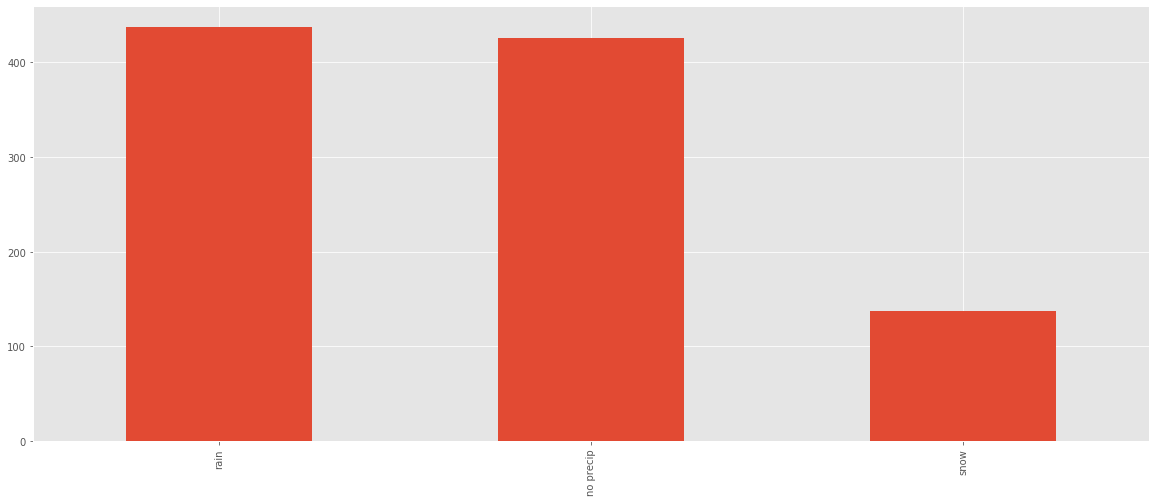

In [19]:
df['precipType'].value_counts().plot(kind='bar')

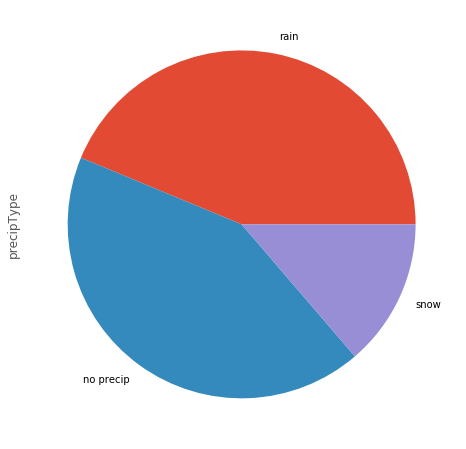

In [20]:
df['precipType'].value_counts().plot(kind='pie')

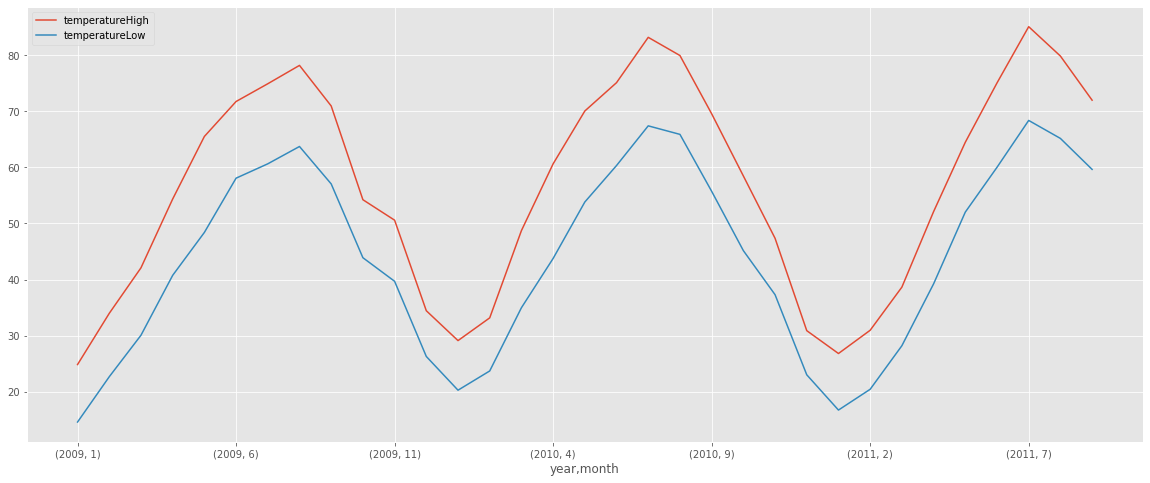

In [21]:
df.groupby(['year','month'])[['temperatureHigh', 'temperatureLow']].mean().plot(kind='line')

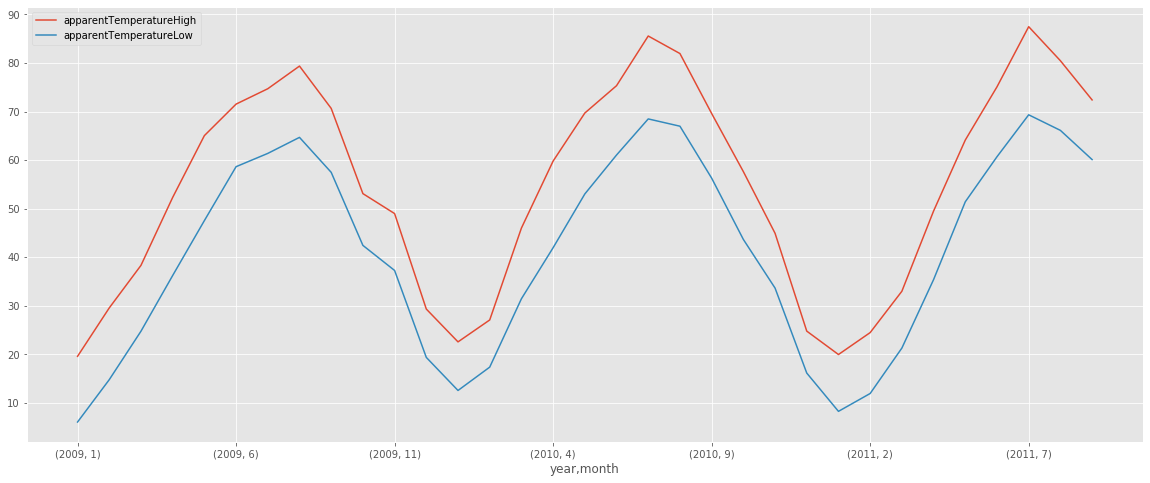

In [22]:
df.groupby(['year','month'])[['apparentTemperatureHigh','apparentTemperatureLow']].mean().plot(kind='line')

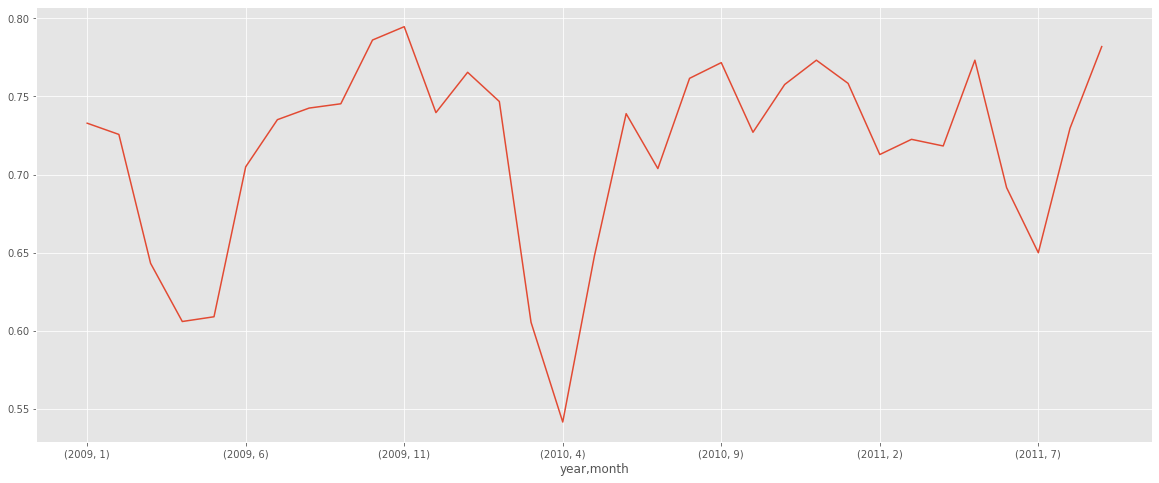

In [23]:
df.groupby(['year','month'])['humidity'].mean().plot(kind='line')

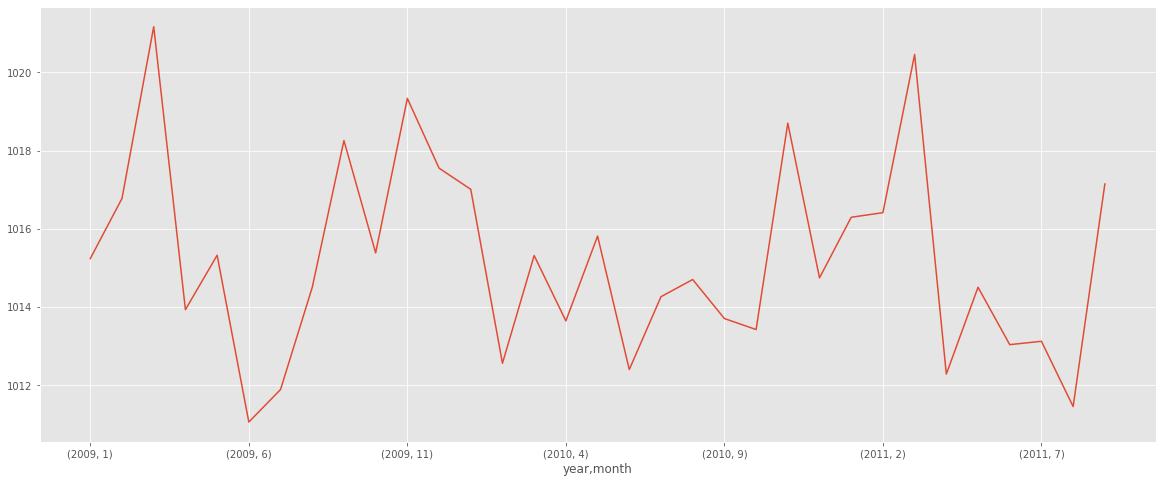

In [24]:
df.groupby(['year','month'])['pressure'].mean().plot(kind='line')

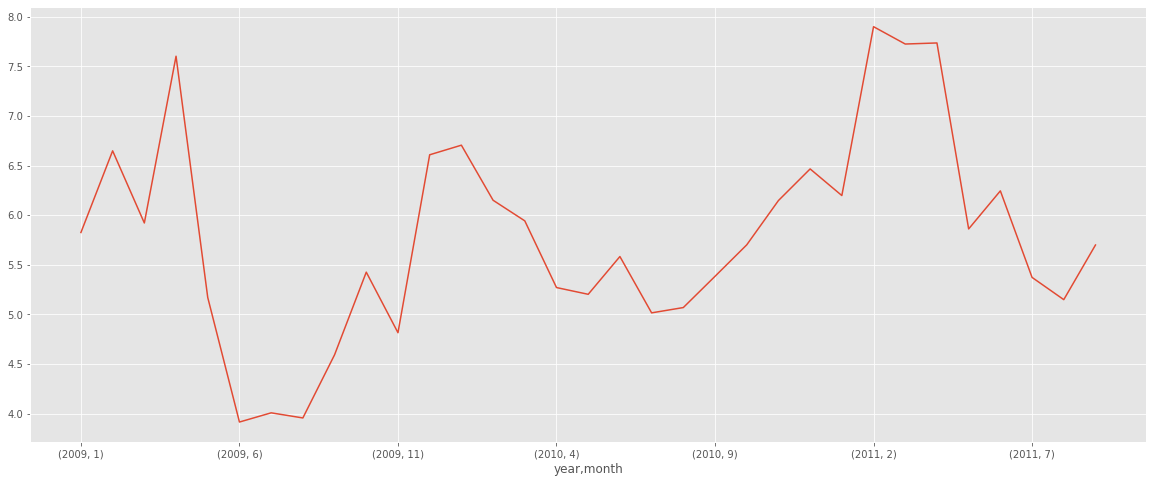

In [25]:
df.groupby(['year','month'])['windSpeed'].mean().plot(kind='line')

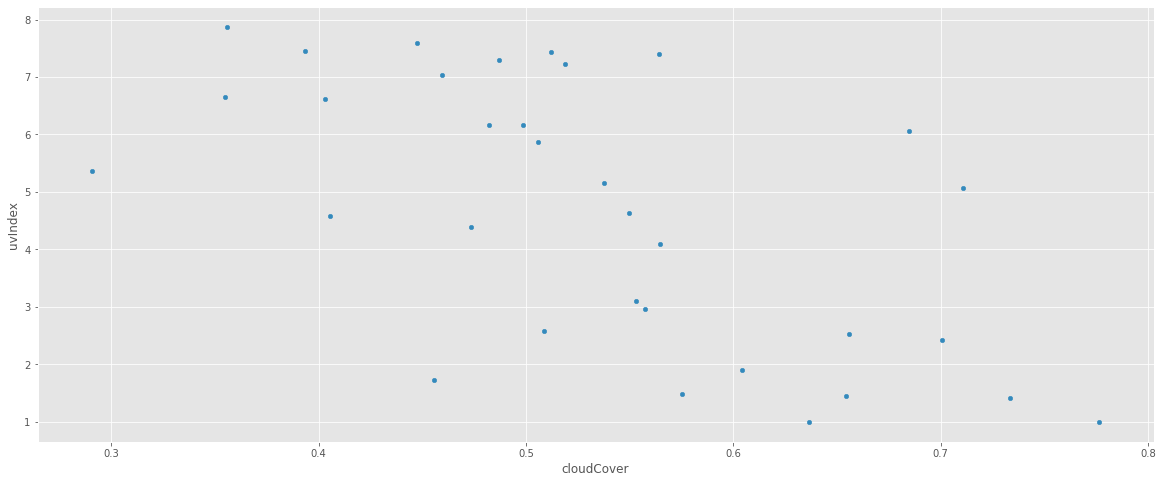

In [26]:

df1=df.groupby(['year','month']).mean()
df1[['cloudCover','uvIndex']].plot(x='cloudCover', y='uvIndex', kind='scatter')